In [2]:
import arff
import pandas as pd

NLS-KDD dataset (Network Security Laboratory Knowledge Discovery in Databases) es un conjunto de datos ampliamente utilizado en investigaciones relacionadas con la detección de intrusiones en redes.Incluye simulaciones de tráfico de red normales y anómalos, con etiquetas que identifican diferentes tipos de actividades maliciosas.

### 1-Lectura del conjunto de datos

In [3]:
def load_kdd_dataset(data_path : str) -> pd.DataFrame:
    """Lectura del conjunto de datos NSL-KDD"""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    atributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=atributes)

In [4]:
df = load_kdd_dataset('data/KDDTrain+.arff')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

### 2. División del conjunto de datos

Se debe separar el conjunto de datos en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validación y pruebas.
Para ello podemos utilizar la función de Sklearn *split_train_test*.

In [6]:
# Separamos el conjunto de datos en 60% train_set y 40% test_set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [7]:
# Separamos el conjunto de prueba inicial en -> 50% validation set, 50% test set

val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [8]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195


### 3. Particionado aleatorio y Stratifiel Sampling

*train_test_split* por defecto realiza un particionado aleatorio del conjunto de datos cada vez que se ejecuta el script. Esto puede ser un problema si no se establece una semilla fija (random_state), ya que se generarán nuevos subconjuntos en cada ejecución, lo que puede ocasionar que el algoritmo "vea" todo el conjunto de datos a lo largo del tiempo, generando Overfitting.

Para evitar esto, se puede utilizar una semilla fija *random_state=[cualquier número]*, lo que asegura que la partición de datos será la misma en cada ejecución, garantizando reproducibilidad. Sin embargo, si queremos mantener el orden original de los datos, especialmente en casos donde hay una secuencia temporal, utilizamos el parámetro *shuffle=False* en la función *train_test_split*. Esto desactiva la mezcla aleatoria de los datos y permite que la división se realice de una forma determinista, preservando el orden específico de los datos.

In [22]:
# Si shuffle=False, el conjunto de datos no se mezclará antes del particionado

val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42, shuffle=False)

El método anterior para dividir los daos está bien si el conjunto de datos es muy grande, pero si no es grande, existe el riesgo de que las características importantes queden desbalanceadas entre los conjuntos de entrenamiento y prueba. Este problema se conoce como *Sampling Bias (sesgo de muestreo)*.

Para solucionarlo, se utiliza un método llamado *Stratified Sampling (muestreo estratificado)*. Este método divide el conjunto de datos en grupos homogéneos llamados estratos. Luego, selecciona una muestra de cada estrato, asegurándose de que la proporción de cada característica se mantenga igual en los conjuntos de entrenamiento y prueba.

Sklearn introduce el parámetro stratify en la función train_test_split para controlar este comportamiento.

In [10]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

### 4. Construcción de la función de particionado ( completa )

In [11]:
def train_val_test_split(df, random_state=42, shuffle=True, stratify=None):
    if stratify:
        strat_col = df[stratify]
    else:
        strat_col = None
    
    train_set, temp_set = train_test_split(df, test_size=0.4, random_state=random_state, shuffle=shuffle, stratify=strat_col)

    if stratify:
        strat_temp = temp_set[stratify]
    else:
        strat_temp = None

    val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=random_state, shuffle=shuffle, stratify=strat_temp)
    
    return train_set, val_set, test_set

In [12]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [13]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195


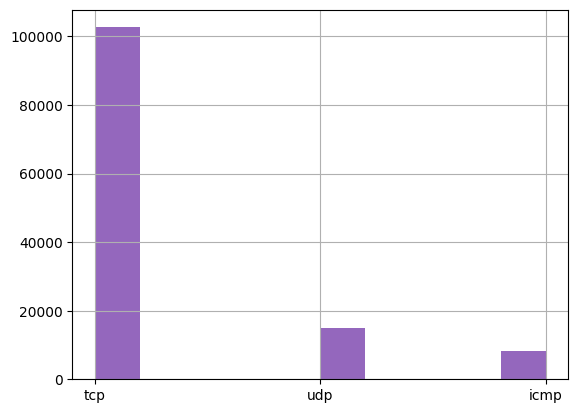

In [18]:
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()
plt.show()

Podremos observar que se mantiene la proporción en cada uno de nuestros subconjuntos observando los siguientes histogramas.

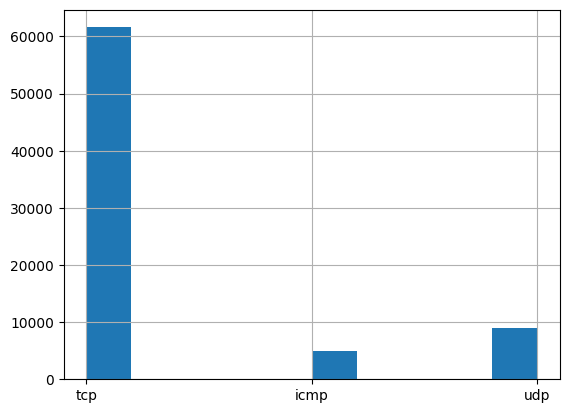

In [19]:
train_set["protocol_type"].hist()
plt.show()

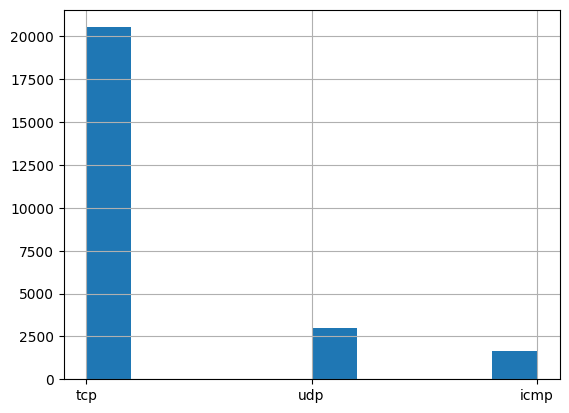

In [20]:
val_set["protocol_type"].hist()
plt.show()

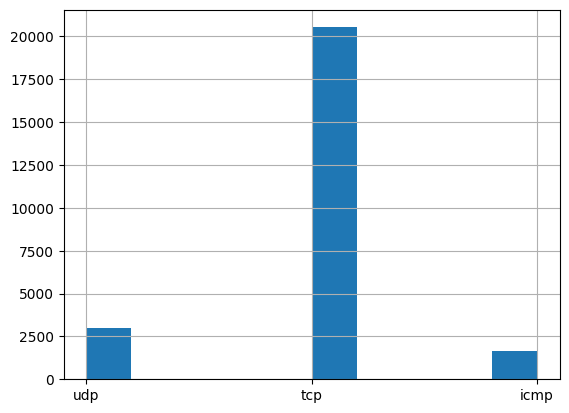

In [21]:
test_set["protocol_type"].hist()
plt.show()